In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '/Users/juliengadonneix/Desktop/stage 3a/data/DREAMER/'
mat = scipy.io.loadmat(path + 'DREAMER.mat')
print(mat.keys())
print(mat['__header__'])
print(mat['__version__'])
print(mat['__globals__'])

dict_keys(['__header__', '__version__', '__globals__', 'DREAMER'])
b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 13 17:20:26 2017'
1.0
[]


In [84]:
data, eeg_sr, ecg_sr, eeg_electrodes, n_subjects, n_videos, _, _, _, _  = mat['DREAMER'][0, 0]
eeg_sr = eeg_sr[0, 0]
ecg_sr = ecg_sr[0, 0]
eeg_electrodes = eeg_electrodes[0]
eeg_electrodes = [eeg_electrodes[i][0] for i in range(eeg_electrodes.size)]
n_subjects = n_subjects[0, 0]
n_videos = n_videos[0, 0]
print(data.shape)
print("EEG sampling rate", eeg_sr)
print("ECG sampling rate", ecg_sr)
print("EEG electrodes", eeg_electrodes)
print("Number of subjects", n_subjects)
print("Number of videos", n_videos)

(1, 23)
EEG sampling rate 128
ECG sampling rate 256
EEG electrodes ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
Number of subjects 23
Number of videos 18


In [38]:
age, gender, eeg, ecg, val, aro, dom = data[0, 0][0][0]
age = age[0]
gender = gender[0]
print("Age", age)
print("Gender", gender)
print(val.shape)
print(aro.shape)
print(dom.shape)

Age 22
Gender male
(18, 1)
(18, 1)
(18, 1)


414


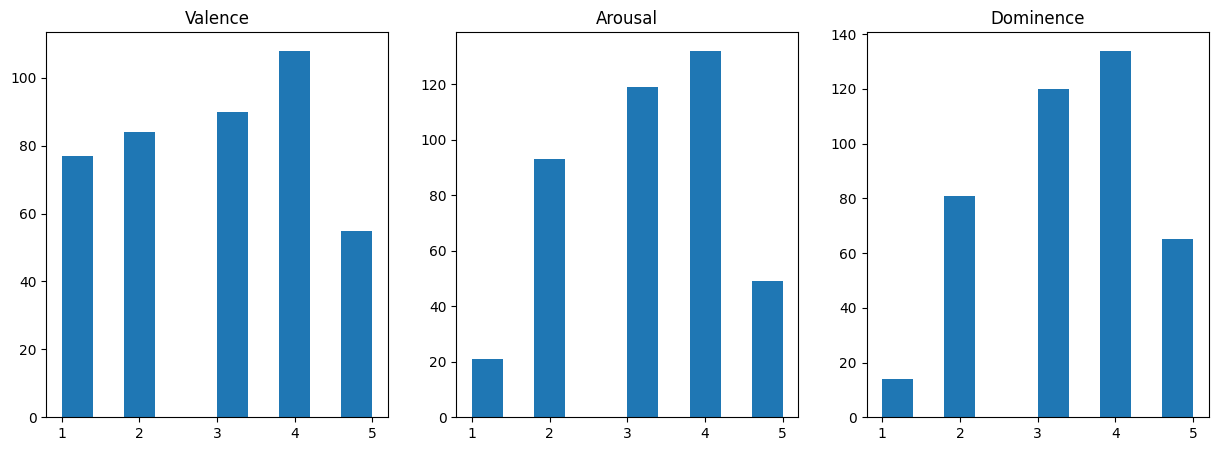

In [100]:
vals = []
aros = []
doms = []
for i in range(n_subjects):
    age, gender, eeg, ecg, val, aro, dom = data[0, i][0][0]
    vals += val.T[0].tolist()
    aros += aro.T[0].tolist()
    doms += dom.T[0].tolist()

print(len(vals))
figs, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(vals)
axes[0].set_title('Valence')
axes[1].hist(aros)
axes[1].set_title('Arousal')
axes[2].hist(doms)
axes[2].set_title('Dominence')
plt.show()

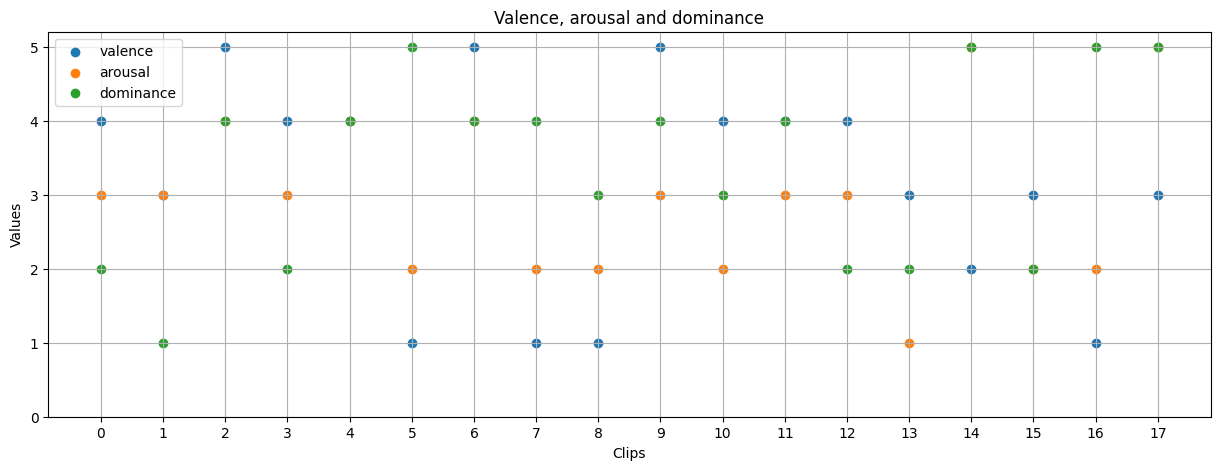

In [83]:
x = np.arange(0, val.shape[0])
y = np.arange(0, np.max(np.concatenate((val, aro, dom), axis=0))+1)

plt.figure(figsize=(15, 5))
plt.scatter(x, val, label='valence')
plt.scatter(x, aro, label='arousal')
plt.scatter(x, dom, label='dominance')
plt.xlabel('Clips')
plt.xticks(x)
plt.ylabel('Values')
plt.yticks(y)
plt.title('Valence, arousal and dominance')
plt.grid()
plt.legend()
plt.show()

In [42]:
baseline_eeg, stimuli_eeg = eeg[0, 0]
baseline_ecg, stimuli_ecg = ecg[0, 0]
print(baseline_eeg.shape)
print(stimuli_eeg.shape)
print(baseline_ecg.shape)
print(stimuli_ecg.shape)

(18, 1)
(18, 1)
(18, 1)
(18, 1)


(7808, 14)
(25472, 14)
(15616, 2)
(50944, 2)


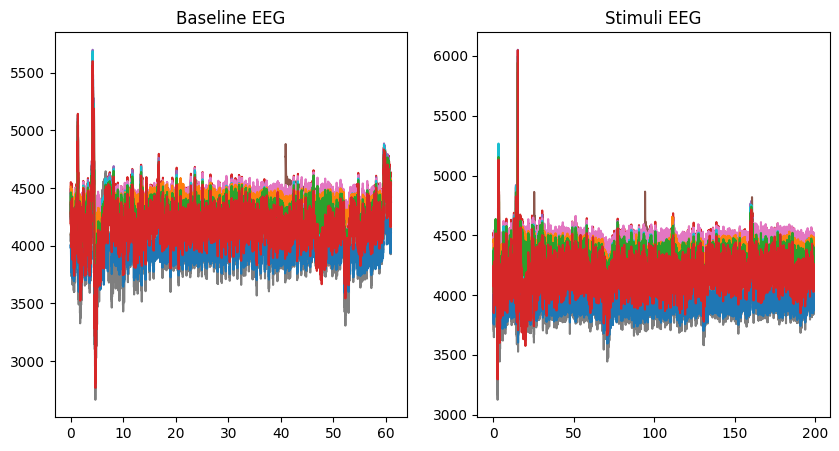

In [67]:
baseline_eeg1 = baseline_eeg[0, 0]
stimuli_eeg1 = stimuli_eeg[0, 0]
baseline_ecg1 = baseline_ecg[0, 0]
stimuli_ecg1 = stimuli_ecg[0, 0]
print(baseline_eeg1.shape)
print(stimuli_eeg1.shape)
print(baseline_ecg1.shape)
print(stimuli_ecg1.shape)


time1 = np.arange(baseline_eeg1.shape[0]) / eeg_sr
time2 = np.arange(stimuli_eeg1.shape[0]) / eeg_sr
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(time1, baseline_eeg1)
plt.title('Baseline EEG')
plt.subplot(1, 2, 2)
plt.plot(time2, stimuli_eeg1)
plt.title('Stimuli EEG')
plt.show()